## **ML Project Part 2**

#### **Import libraries**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# IMPORT LIBRARIES

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import CenterCrop
from tensorflow.keras.layers import Rescaling
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.regularizers import l2
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from sklearn.svm import SVC

In [3]:
# LOAD TEST AND TRAINING DATA

# Part 1
x_train_1 = np.load('/content/gdrive/MyDrive/ML/Data/Xtrain_Classification_Part1.npy')
y_train_1 = np.load('/content/gdrive/MyDrive/ML/Data/Ytrain_Classification_Part1.npy')
x_test_1 = np.load('/content/gdrive/MyDrive/ML/Data/Xtest_Classification_Part1.npy')

xtrainreshape = np.reshape(x_train_1,(len(x_train_1),50,50))
xtestreshape = np.reshape(x_test_1,(len(x_test_1),50,50))

# turn y train into categorical data
y_train_cat = to_categorical(y_train_1, 2)

division=round(0.8*len(y_train_1))

values, counts = np.unique(y_train_1, return_counts=True)
print('Classes:',values)
print('Classes Probability:',counts/len(y_train_1))

Classes: [0. 1.]
Classes Probability: [0.42797527 0.57202473]


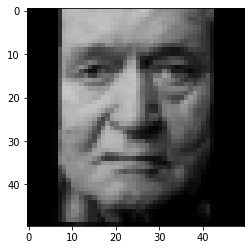

In [ ]:
# VISUALIZE DATA
i=684
data = x_train_1[i]
data_forimage = np.reshape(data,(50,50))
plt.imshow(data_forimage,cmap='gray', vmin=0, vmax=255)
#print(ypred[i])

def imshow(img):
    img = img.reshape(50,50)
    plt.imshow(img,cmap='gray')



#### **Convolutional Neural Network**

In [ ]:
#%% Create Layers
inputs = keras.Input(shape=(50, 50, 1),name='Input')

x = Rescaling(scale=1.0 / 255,name='Rescaling')(inputs)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=8, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Flatten(name='Flattening')(x)
x = layers.Dense(32, activation="relu", name="FC")(x) # Fully connected layer

num_classes = 2
outputs = layers.Dense(num_classes, activation="sigmoid", name='Classifier')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

# Compile
model.compile(optimizer='adam', metrics=['accuracy'],loss='categorical_crossentropy')
batch_size=50
callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

history=model.fit(xtrainreshape[0:division], y_train_cat[0:division],batch_size=batch_size, epochs=100, validation_data=(xtrainreshape[division:], y_train_cat[division:]),callbacks=[callback])

# Predictions
ypred = model.predict(xtrainreshape[division:])
ypred = [np.argmax(i) for i in ypred]
print('balanced accuracy:',balanced_accuracy_score(ypred,y_train_1[division:]))


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 50, 50, 1)]       0         
                                                                 
 Rescaling (Rescaling)       (None, 50, 50, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 8)        0         
 2D)                                                       

In [ ]:
plot_model(model, to_file='/content/gdrive/MyDrive/ML/Images/CNN_model_plot.png',show_shapes=True, show_layer_names=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


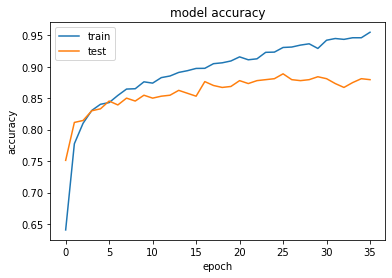

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


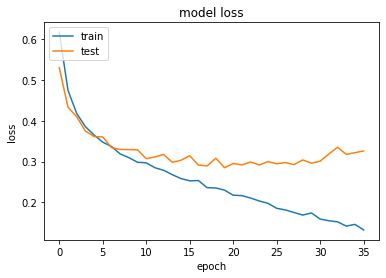

In [ ]:
#%% Plot accuracy and loss
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/gdrive/MyDrive/ML/Images/CNN_accuracy_evolution.eps",format='eps')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("/content/gdrive/MyDrive/ML/Images/CNN_loss_evolution.eps",format='eps')
plt.show()

In [ ]:
# Prediction of validation set
ypredval = model.predict(xtrainreshape[division:])
ypredval = [np.argmax(i) for i in ypredval]

print('balanced accuracy:',balanced_accuracy_score(ypredval,y_train_1[division:]))

balanced accuracy: 0.8872583309044981


#### **Multilayer Perceptron**

In [ ]:
num_classes = 2
X_train = x_train_1
X_test = x_test_1
# Convert target classes to categorical ones
Y_train = y_train_cat

# Set the input shape
input_shape = (2500,)
#print(f'Feature shape: {input_shape}')

# Create model
MLP_model = Sequential()
MLP_model.add(Dense(100, input_shape=input_shape, activation='relu'))
MLP_model.add(Dense(50, activation='relu'))
MLP_model.add(Dense(30, activation='relu'))
MLP_model.add(Dense(num_classes, activation='sigmoid'))
MLP_model.summary()
# Configure the model and start training
MLP_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size=100
MLP_callback=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)
history = MLP_model.fit(X_train[0:division], Y_train[0:division],batch_size=batch_size, epochs=100, validation_data=(X_train[division:], Y_train[division:]),callbacks=[MLP_callback])

ypredmlp = MLP_model.predict(X_train[division:])
ypredmlp = [np.argmax(i) for i in ypredmlp]
print('balanced accuracy:',balanced_accuracy_score(ypredmlp,y_train_1[division:]))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               250100    
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 2)                 62        
                                                                 
Total params: 256,742
Trainable params: 256,742
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
59/59 [==============================] - 1s 10ms/step - loss: 14.9568 - accuracy: 0.5784 - val_loss: 7.8395 - val_accuracy: 0.5703
Epoch 2/100
59/59 [====================

In [ ]:
history.history['val_loss']

[7.839498043060303,
 1.324136734008789,
 7.815991401672363,
 6.425027370452881,
 1.0497853755950928,
 4.640710830688477,
 0.6770109534263611,
 1.1409149169921875,
 1.0926599502563477,
 0.5243098735809326,
 1.387061595916748,
 0.4630703330039978,
 1.261607050895691,
 1.1046985387802124,
 0.386864572763443,
 0.43173009157180786,
 0.3778553605079651,
 0.5072881579399109,
 0.36627447605133057,
 0.3676868677139282,
 0.6120161414146423,
 0.34689703583717346,
 0.5436955690383911,
 0.3597467839717865,
 0.3382664918899536,
 0.34501442313194275,
 0.3970305323600769,
 0.42412471771240234,
 0.35078054666519165]

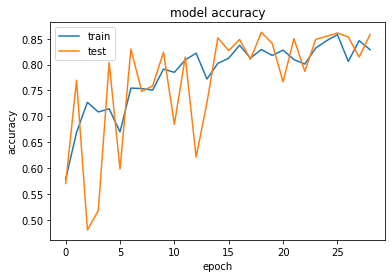

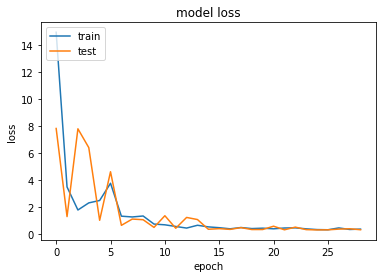

In [ ]:
#%% Plot accuracy and loss
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig("/content/gdrive/MyDrive/ML/Images/MLP_accuracy_evolution.eps",format='eps')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig("/content/gdrive/MyDrive/ML/Images/MLP_loss_evolution.eps",format='eps')
plt.show()

#### **Support Vector Machine**

In [ ]:
# Test different hyperparameters
from sklearn.svm import SVC
results=[]
for kernel in ['linear', 'rbf', 'poly']:
  for gamma in ['auto','scale']:
    #for C in [1,5,10,20,30]:
    SVCmodel = SVC(kernel=kernel,gamma=gamma)
    SVCmodel.fit(x_train_1[0:division],y_train_1[0:division])
    ypredsvm = SVCmodel.predict(x_train_1[division:])
    results.append([kernel,gamma,1,balanced_accuracy_score(ypredsvm,y_train_1[division:])])

In [ ]:
# best overall
m = 0
ind = 0
for i in range(len(results)):
    if float(results[i][-1]) > m:
        m = float(results[i][-1])
        ind = i
print('best:', results[ind])

best: ['poly', 'scale', 1, 0.8786427204187663]


In [ ]:
results

[['linear', 'auto', 1, 0.7884038491506935],
 ['linear', 'scale', 1, 0.7884038491506935],
 ['rbf', 'auto', 1, 0.6391741071428572],
 ['rbf', 'scale', 1, 0.852221308103661],
 ['poly', 'auto', 1, 0.8667291189375994],
 ['poly', 'scale', 1, 0.8786427204187663]]

In [ ]:
# Test parameter C
for C in [1,2,10]:
  SVCmodel = SVC(kernel='poly',gamma='scale',C=C)
  SVCmodel.fit(x_train_1[0:division],y_train_1[0:division])
  ypredsvm = SVCmodel.predict(x_train_1[division:])
  results.append([kernel,gamma,C,balanced_accuracy_score(ypredsvm,y_train_1[division:])])

# best overall
m = 0
ind = 0
for i in range(len(results)):
    if float(results[i][-1]) > m:
        m = float(results[i][-1])
        ind = i
print('best:', results[ind])

best: ['poly', 'scale', 1, 0.8786427204187663]


In [ ]:
from sklearn.svm import SVC
SVC2 = SVC(kernel='rbf',gamma='scale',C=20)
SVC2.fit(x_train_1[0:division],y_train_1[0:division])
ypredsvm = SVC2.predict(x_train_1[division:])

print('balanced accuracy:',balanced_accuracy_score(ypredsvm,y_train_1[division:]))
print(classification_report(y_train_1[division:],ypredsvm))

balanced accuracy: 0.871774036590113
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       284
         1.0       0.88      0.89      0.89       363

    accuracy                           0.87       647
   macro avg       0.87      0.87      0.87       647
weighted avg       0.87      0.87      0.87       647



#### **Prediction**

In [ ]:
# Predictions
ypred = model.predict(xtestreshape)
ypred = np.array([np.argmax(i) for i in ypred])
print(ypred.shape)
np.save('/content/gdrive/MyDrive/ML/ypred.npy',ypred)

(1164,)
